In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataframe desde un archivo CSV
df = pd.read_csv('platforms_and_ratings.csv')


In [3]:
# Explorar los primeros 5 registros del dataframe
df.head()

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,id,platform,duration_int,duration_type,score_mean
0,movie,ricky velez: here's everything,NaN,NaN,NaN,2021-10-24,2021,tv-ma,"comedy, stand up",​comedian ricky velez bares it all with his ho...,hs1,hulu,0,NaN,3.6
1,movie,silent night,NaN,NaN,NaN,2021-10-23,2020,g,"crime, drama, thriller","mark, a low end south london hitman recently r...",hs2,hulu,94,min,3.5
2,movie,the marksman,NaN,NaN,NaN,2021-10-23,2021,pg-13,"action, thriller",a hardened arizona rancher tries to protect an...,hs3,hulu,108,min,3.5
3,movie,gaia,NaN,NaN,NaN,2021-10-22,2021,r,horror,a forest ranger and two survivalists with a cu...,hs4,hulu,97,min,3.6
4,movie,settlers,NaN,NaN,NaN,2021-10-22,2021,g,"science fiction, thriller",mankind's earliest settlers on the martian fro...,hs5,hulu,104,min,3.4


In [4]:
# Verificar el tipo de dato de cada columna
print(df.dtypes)


type              object
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating            object
listed_in         object
description       object
id                object
platform          object
duration_int       int64
duration_type     object
score_mean       float64
dtype: object


In [5]:
# Verificar si hay valores nulos en el dataframe
print(df.isnull().sum())


type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
listed_in            0
description          4
id                   0
platform             0
duration_int         0
duration_type      482
score_mean           0
dtype: int64


In [6]:
# Calcular la cantidad de valores únicos en cada columna
print(df.nunique())


type                 2
title            22042
director         10095
cast             16744
country            886
date_added        2003
release_year       101
rating             105
listed_in         1687
description      22669
id               22998
platform             4
duration_int       225
duration_type        2
score_mean           5
dtype: int64


In [7]:
# Obtener estadísticas descriptivas para las columnas numéricas
print(df.describe())


       release_year  duration_int    score_mean
count  22998.000000  22998.000000  22998.000000
mean    2010.811244     65.710584      3.533286
std       15.401142     51.760868      0.056929
min     1920.000000      0.000000      3.300000
25%     2010.000000      3.000000      3.500000
50%     2016.000000     83.000000      3.500000
75%     2019.000000    101.000000      3.600000
max     2021.000000    601.000000      3.700000


In [8]:
# Calcular correlaciones entre las variables
print(df.corr())


              release_year  duration_int  score_mean
release_year      1.000000     -0.133989    0.008461
duration_int     -0.133989      1.000000   -0.008836
score_mean        0.008461     -0.008836    1.000000


C:\Users\Usuario\AppData\Local\Temp\ipykernel_4836\3630939946.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


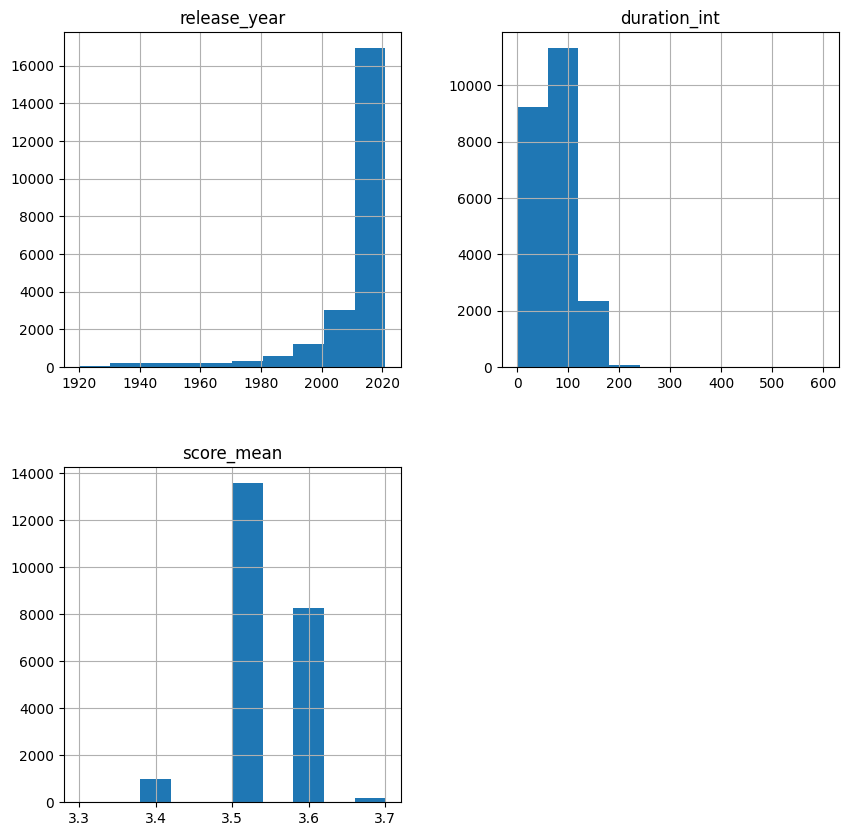

In [9]:
# Visualizar histogramas de las variables numéricas
df.hist(figsize=(10,10))
plt.show()


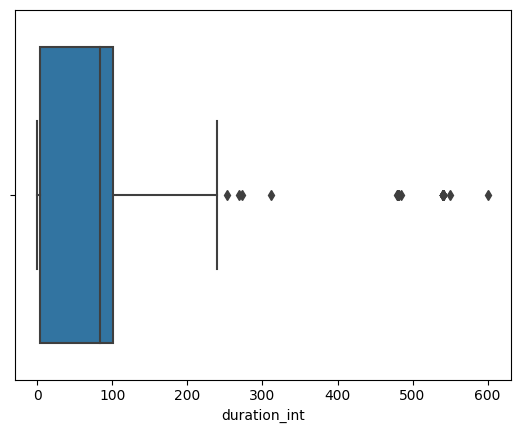

In [10]:
# Visualizar un boxplot de la variable "duration_int" para detectar valores atípicos
sns.boxplot(x=df['duration_int'])
plt.show()


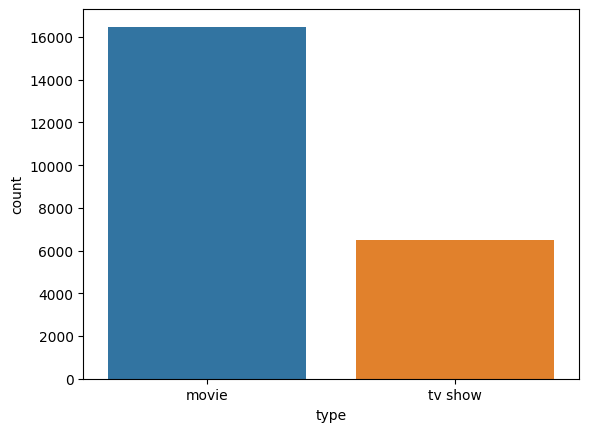

In [11]:
# Visualizar un gráfico de barras de la variable "type" para ver la distribución entre "movie" y "tv-show"
sns.countplot(x=df['type'])
plt.show()


In [12]:
# Crear una nueva columna para la década de lanzamiento de las películas o programas de televisión
df['decade'] = df['release_year'].apply(lambda x: str(x)[:3] + "0s")


In [13]:
# Agrupar por la nueva columna "decade" y obtener el recuento de películas o programas de televisión en cada década
df_decade = df.groupby('decade').size().reset_index(name='counts')
print(df_decade)


   decade  counts
0   1920s      25
1   1930s     174
2   1940s     229
3   1950s     236
4   1960s     216
5   1970s     329
6   1980s     536
7   1990s    1140
8   2000s    2686
9   2010s   12636
10  2020s    4791


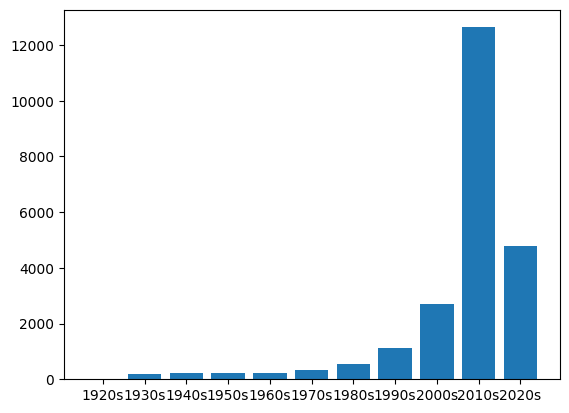

In [14]:
# Visualizar un gráfico de barras de la cantidad de películas o programas de televisión por década
plt.bar(df_decade['decade'], df_decade['counts'])
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_4836\4161687481.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


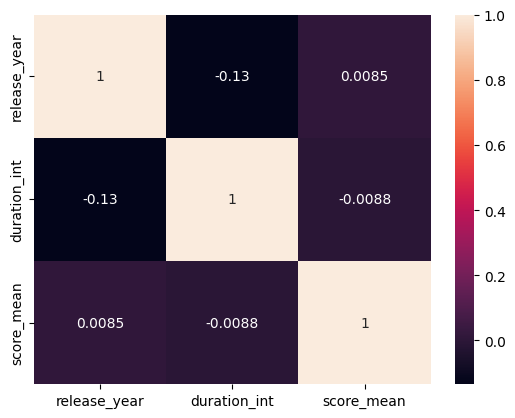

In [15]:
# Visualizar un heatmap de las correlaciones entre las variables
sns.heatmap(df.corr(), annot=True)
plt.show()


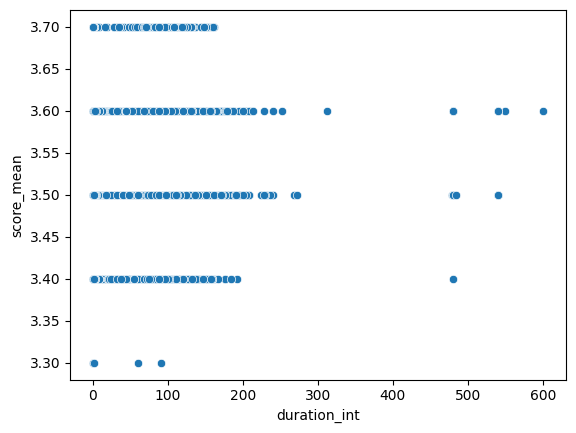

In [16]:
# Visualizar un scatterplot de la relación entre las variables "duration_int" y "score_mean"
sns.scatterplot(x=df['duration_int'], y=df['score_mean'])
plt.show()


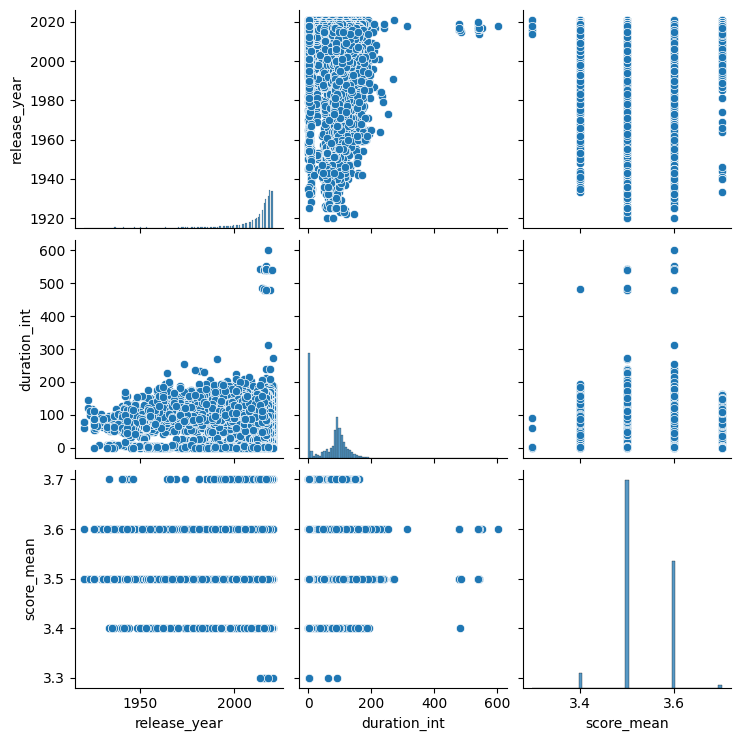

In [17]:
# Visualizar un pairplot de las relaciones entre las variables numéricas
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()


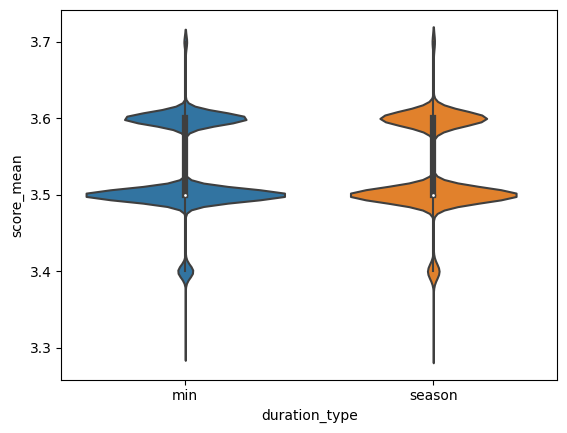

In [18]:
# Visualizar un violinplot de la variable "duration_type" y "score_mean"
sns.violinplot(x=df['duration_type'], y=df['score_mean'])
plt.show()


In [19]:
# Agrupar por la columna "listed_in" y obtener el recuento de películas o programas de televisión en cada género
df_genre = df.groupby('listed_in').size().reset_index(name='counts')
df_genre = df_genre.sort_values(by='counts', ascending=False).head(10)


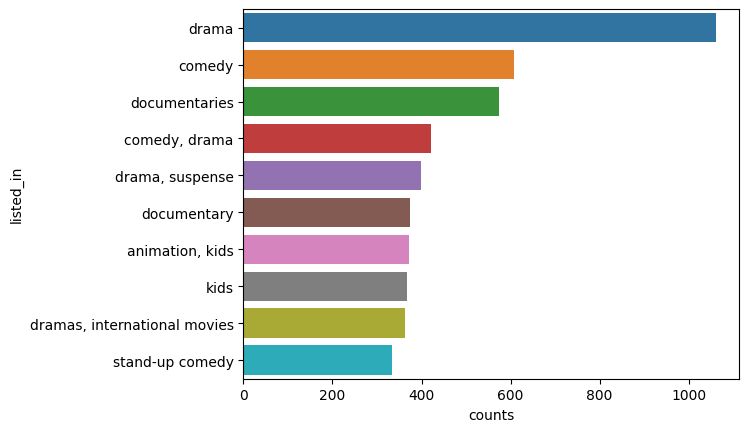

In [20]:
# Visualizar un gráfico de barras horizontal de los 10 géneros más populares
sns.barplot(x='counts', y='listed_in', data=df_genre)
plt.show()


In [21]:
# Países con mayor cantidad de producciones
df_country = df.groupby('country').size().reset_index(name='counts')
df_country


,country,counts
0,", france, algeria",1
1,", south korea",1
2,"afghanistan, france",1
3,"afghanistan, united states",1
4,argentina,58
...,...,...
881,venezuela,2
882,"venezuela, colombia",1
883,vietnam,7
884,west germany,1
